In [1]:
import IPython.display as ipd
% pylab inline
import os
import pandas as pd
import librosa
import glob 
ipd.Audio('./audio/BP1_Asthma,I E W,P L L,70,M.wav')
samp='./audio/BP1_Asthma,I E W,P L L,70,M.wav'

Populating the interactive namespace from numpy and matplotlib


In [2]:
samp='./audio/BP1_Asthma,I E W,P L L,70,M.wav'
data, sampling_rate = librosa.load(samp)
#X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
#mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

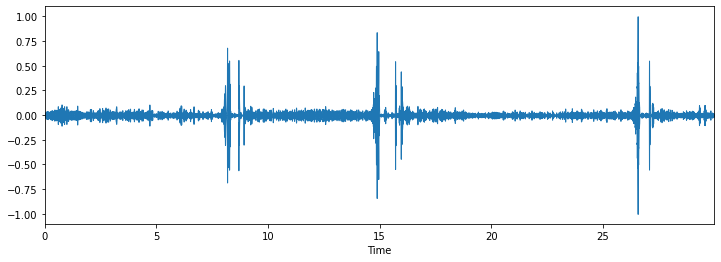

In [3]:
from librosa import display

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [6]:
file_name="./audio/Data annotation.xlsx"
dfs = pd.read_excel(file_name, sheet_name=None)
dfs=dfs['Sheet1']
df = dfs[dfs['Diagnosis'].notna()]
df=df[['Age',"Gender","Location","Sound type",'Diagnosis']]
df.loc[df["Diagnosis"].str.contains("asthma"), "Diagnosis"]="Asthma"
df.loc[df["Diagnosis"].str.contains("N"), "Diagnosis"]="Normal"
df.loc[df["Diagnosis"].str.contains("heart failure"), "Diagnosis"]="Heart_Failure"

df = df.groupby('Diagnosis').filter(lambda x : len(x)>7)
#df['Diagnosis'].value_counts()#['Diagnosis']="Asthma"
df

,Age,Gender,Location,Sound type,Diagnosis
0,70.0,M,P L L,I E W,Asthma
1,52.0,F,P L L,E W,Asthma
2,50.0,F,P L L,I E W,Asthma
8,59.0,M,P R L,E W,Asthma
9,59.0,M,P R U,E W,Asthma
...,...,...,...,...,...
107,63.0,M,P R L,E W,COPD
108,26.0,M,P L M,N,Normal
109,62.0,M,P L L,E W,COPD
110,51.0,M,P R L,E W,COPD


In [7]:
import os

arr = os.listdir("./audio/Audio_Files")
arr

['BP100_N,N,P R M,70,F.wav',
 'BP101_Asthma,E W,P L M,12,F.wav',
 'BP102_N,N,P L L,41,M.wav',
 'BP103_N,N,P R U,81,F.wav',
 'BP104_Asthma,E W,P L U,45,F.wav',
 'BP105_Lung Fibrosis,Crep,A U R,44,M.wav',
 'BP106_Asthma,E W,P L U,45,F.wav',
 'BP107_Asthma,E W,P L U,59,F.wav',
 'BP108_COPD,E W,P R L ,63,M.wav',
 'BP109_N,N,P L M,26,M.wav',
 'BP10_Asthma,E W,P R U,59,M.wav',
 'BP110_COPD,E W,P L L,62,M.wav',
 'BP111_COPD,E W,P R L ,51,M.wav',
 'BP112_N,N,P L M,30,M.wav',
 'BP11_Heart Failure,C,P L L,53,M.wav',
 'BP12_Asthma,E W,P L L,50,F.wav',
 'BP13_Heart Failure,C,P L L,55,M.wav',
 'BP14_Heart Failure,C,A R M,54,M.wav',
 'BP15_Asthma,E W,P R U,49,F.wav',
 'BP16_heart failure,C,P R U,56,M.wav',
 'BP17_COPD,E W,A R M,57,M.wav',
 'BP18_pneumonia,C,P R U,57,M.wav',
 'BP19_heart failure,C,P R U,70,F.wav',
 'BP1_Asthma,I E W,P L L,70,M.wav',
 'BP20_Asthma and lung fibrosis,C,A R M,90,M.wav',
 'BP21_BRON,Crep,P R L ,20,M.wav',
 'BP22_BRON,Crep,P R U,24,M.wav',
 'BP23_Lung Fibrosis,Crep,P R L ,

In [8]:
filelist=[]
labels=[]
raw=[]
for aud in arr:
    k=aud.split('_')
    k=k[1].split(',')[0]
    raw.append(k)
    if k=="Asthma" or k=="N" or k=="copd" or k=="COPD" or k=="heart failure":
        filelist.append(aud)
        labels.append(k)

# for m in j:
#     m.replace()
for k in range(len(labels)):
    labels[k]=labels[k].replace('N',"Normal")
    labels[k]=labels[k].replace('copd',"COPD")
    labels[k]=labels[k].replace('asthma',"Asthma")
    labels[k]=labels[k].replace('heart failure',"Heart_Failure")
classes = set(labels)   
# for i in set(raw):
#     print(i,raw.count(i))
classes

{'Asthma', 'COPD', 'Heart_Failure', 'Normal'}

In [9]:
print("Normal",labels.count("Normal"))
print("Asthma",labels.count("Asthma"))
print("COPD",labels.count("COPD"))
print("Heart_Failure",labels.count("Heart_Failure"))
print("total",len(labels),"test_files",len(filelist))

Normal 105
Asthma 51
COPD 27
Heart_Failure 45
total 228 test_files 228


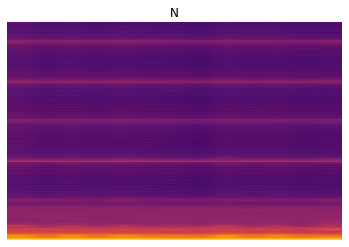

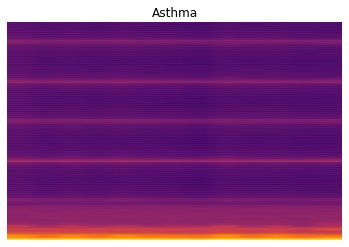

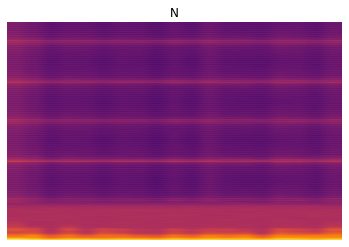

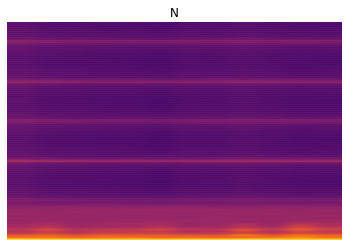

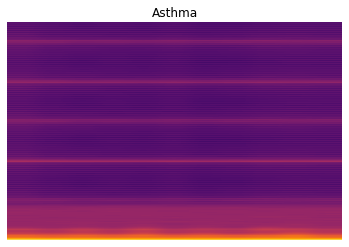

In [17]:
x=[]
y=labels
cmap = plt.get_cmap('inferno')
for i in filelist[:5]:
    samp = "./audio/Audio_Files/"+i
    X, sample_rate = librosa.load(samp, res_type='kaiser_fast') 
    #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    #x.append(mfccs)
    #mfccs = librosa.power_to_db(mfccs, ref=np.max)
    plt.specgram(X, NFFT=sample_rate, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
    plt.axis('off')
    plt.title(i.split("_")[1].split(',')[0])
    plt.show()

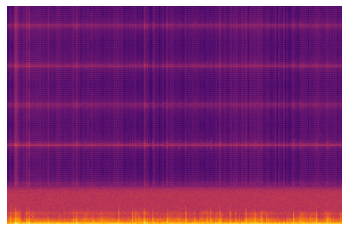

In [191]:
%matplotlib inline
cmap = plt.get_cmap('inferno')
j=plt.specgram(X, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off')
plt.show()
#plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
#plt.clf()


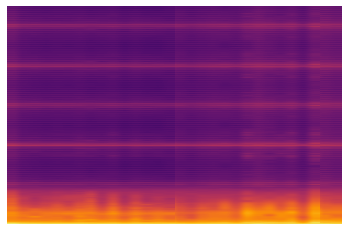

In [56]:
x=[]
y=labels
cmap = plt.get_cmap('inferno')

def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img
count = 0
for i in filelist:
    samp = "./audio/Audio_Files/"+i
    X, sample_rate = librosa.load(samp, res_type='kaiser_fast') 
    #mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    #x.append(mfccs)
    #mfccs = librosa.power_to_db(mfccs, ref=np.max)
    plt.specgram(X, NFFT=sample_rate, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
    plt.axis('off')
    #plt.title(i.split("_")[1].split(',')[0])
    name = i.split("_")[1].split(',')[0]
    plt.savefig(f'./audio/image_data/{name}{count}.png',bbox_inches='tight',pad_inches = 0)
    count+=1
    #     plt.show()
    #     x.append(mfccs)

In [33]:
x[0][0].shape

(11026, 13)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:706: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

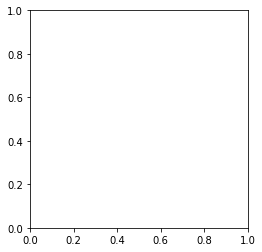

In [41]:
plt.imshow(x[:1], interpolation='nearest')
plt.show()